# Installing packages

In [1]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib pandas numpy sns scipy sklearn nbconvert openpyxl termcolor

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy import stats
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from termcolor import colored

In [4]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = mean(data1), mean(data2)
 # calculate standard errors
 se1, se2 = sem(data1), sem(data2)
 # standard error on the difference between the samples
 sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p

## Toy Samples

In [5]:
mu2, sigma2 = 25, 5 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 5000)
mu, sigma = 30, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)
zz = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

# Population

In [6]:
df = pd.read_excel('DBGeneticExpressionOvaries.xlsx')
df['Group'] = df['Amostra'].apply(lambda x: x[0])
df['Day'] = df['Amostra'].apply(lambda x: int(x[1]) if x[1] != 'u' else 0)
df.head()

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.178,26.597,28.589,A,1
1,A1-1,19.206,26.662,28.752,A,1
2,A1-2,18.391,28.084,30.028,A,1
3,A1-2,18.282,28.165,29.857,A,1
4,A1-3,18.034,25.990,28.405,A,1


In [7]:
df[df['VG'].isna()]

,Amostra,RPL32,VGR,VG,Group,Day
19,Pu-1,19.253,27.473,NaN,P,0


In [8]:
df[df['Amostra'] == 'Pu-1']['VG'].mean() 

35.748

In [9]:
# df[df['Amostra'] == 'Pu-1']['VG'] = df[df['Amostra'] == 'Pu-1']['VG'].mean() 

In [10]:
df[df.Amostra.str.startswith('C4')]['VG']

48    28.295
49    28.456
50    23.278
51    23.316
52    29.892
53    30.557
Name: VG, dtype: float64

In [11]:
df[df.Amostra.str.startswith('C4')]['VG'].mean()

27.298999999999996

In [12]:
df.loc[df.Amostra == 'C4-2',  'VG']  = [27.2989, 27.2989]

In [13]:
df[df.Amostra.str.startswith('C4')]['VG']

48    28.2950
49    28.4560
50    27.2989
51    27.2989
52    29.8920
53    30.5570
Name: VG, dtype: float64

In [14]:
df.describe()

,RPL32,VGR,VG,Day
count,78.000000,78.00000,77.000000,78.000000
mean,18.600436,26.19741,29.460348,4.000000
std,0.843461,1.67892,2.831995,3.006486
min,16.984000,23.14400,25.414000,0.000000
25%,17.979000,25.02800,28.038000,1.000000
50%,18.638000,26.13050,28.683000,4.000000
75%,19.276250,27.14975,30.028000,8.000000
max,20.269000,31.17200,40.000000,8.000000


In [15]:
df_mean = df # df.groupby(['Amostra', 'Group']).mean().reset_index()

In [16]:
df_mean

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.178,26.597,28.589,A,1
1,A1-1,19.206,26.662,28.752,A,1
2,A1-2,18.391,28.084,30.028,A,1
3,A1-2,18.282,28.165,29.857,A,1
4,A1-3,18.034,25.990,28.405,A,1
...,...,...,...,...,...,...
73,D8-1,19.539,27.053,29.749,D,8
74,D8-2,19.284,25.174,28.861,D,8
75,D8-2,19.376,25.148,28.742,D,8
76,D8-3,17.977,24.007,27.672,D,8


Each distribution is a total of eggs layed during 10 days for each female individual

In [17]:
df_mean['DCT_VG'] =  df_mean['VG'] - df_mean['RPL32']
df_mean['DCT_VGR'] =  df_mean['VGR'] - df_mean['RPL32']
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956


In [18]:
df_mean['DCT_VG'].min() 

6.601000000000003

In [19]:
df_mean['DDCT_VG'] =  df_mean['DCT_VG'] - 4.3159
df_mean['DDCT_VGR'] =  df_mean['DCT_VGR'] - df_mean['DCT_VGR'].min()
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.0951,1.984
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.2301,2.021
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.3211,4.258
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.2591,4.448
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.0551,2.521


In [20]:
df_mean['EXP_DDCT_VG'] =  df_mean['DDCT_VG'].apply(lambda x: 2**(-x)) 
df_mean['EXP_DDCT_VGR'] =  df_mean['DDCT_VGR'].apply(lambda x: 2**(-x)) 
df_mean

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.0951,1.984,0.029256,0.252788
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.2301,2.021,0.026643,0.246387
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.3211,4.258,0.006254,0.052265
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.2591,4.448,0.006528,0.045816
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.0551,2.521,0.015039,0.174222
...,...,...,...,...,...,...,...,...,...,...,...,...
73,D8-1,19.539,27.053,29.749,D,8,10.210,7.514,5.8941,2.079,0.016815,0.236678
74,D8-2,19.284,25.174,28.861,D,8,9.577,5.890,5.2611,0.455,0.026077,0.729510
75,D8-2,19.376,25.148,28.742,D,8,9.366,5.772,5.0501,0.337,0.030183,0.791686
76,D8-3,17.977,24.007,27.672,D,8,9.695,6.030,5.3791,0.595,0.024029,0.662044


## Error Plot

In [21]:
2**(-5.0951)

0.029256479757398736

In [22]:
color_map = {
    'P': 'Grey', 
    'A': 'Green', 
    'B': 'Blue', 
    'C': 'Red', 
    'D': 'Yellow'}

In [23]:
df_day_stats = df_mean.groupby(['Group', 'Day']).describe().reset_index()
df_day_stats.columns = ['_'.join(tuple(map(str, t))) for t in df_day_stats.columns.values]
df_day_stats['EXP_DDCT_VG_error'] = df_day_stats['EXP_DDCT_VG_std'] / (df_day_stats['EXP_DDCT_VG_count']**(1/2))
df_day_stats['EXP_DDCT_VGR_error'] = df_day_stats['EXP_DDCT_VGR_std'] / (df_day_stats['EXP_DDCT_VGR_count']**(1/2))
df_day_stats['GroupDay'] = df_day_stats['Group_'].astype(str) + df_day_stats['Day_'].astype(str)
df_day_stats['Color'] = df_day_stats['Group_'].map(lambda x: color_map[x])
df_day_stats = df_day_stats.sort_values(['Day_', 'Group_'])
df_day_stats.to_excel('ovaries_stats.xlsx')
df_day_stats[['GroupDay', 'Color', 'EXP_DDCT_VG_error', 'EXP_DDCT_VGR_error', 'EXP_DDCT_VGR_mean', 'EXP_DDCT_VG_mean',  'EXP_DDCT_VGR_std', 'EXP_DDCT_VGR_max']]


,GroupDay,Color,EXP_DDCT_VG_error,EXP_DDCT_VGR_error,EXP_DDCT_VGR_mean,EXP_DDCT_VG_mean,EXP_DDCT_VGR_std,EXP_DDCT_VGR_max
12,P0,Grey,0.000062,0.063979,0.198274,0.000153,0.156715,0.469436
0,A1,Green,0.003998,0.037497,0.147408,0.016241,0.091848,0.252788
3,B1,Blue,0.002867,0.026472,0.088090,0.009885,0.064842,0.185823
6,C1,Red,0.001733,0.090340,0.357892,0.010051,0.221287,0.582367
9,D1,Yellow,0.005507,0.117314,0.295808,0.020046,0.287360,0.691595
1,A4,Green,0.002283,0.052545,0.147616,0.014571,0.128708,0.334250
4,B4,Blue,0.005670,0.086167,0.294490,0.023865,0.211065,0.571173
7,C4,Red,0.010587,0.123574,0.523002,0.029697,0.302693,0.814508
10,D4,Yellow,0.028559,0.020163,0.254643,0.095677,0.049390,0.334250
2,A8,Green,0.003503,0.097908,0.659310,0.036537,0.239826,1.000000


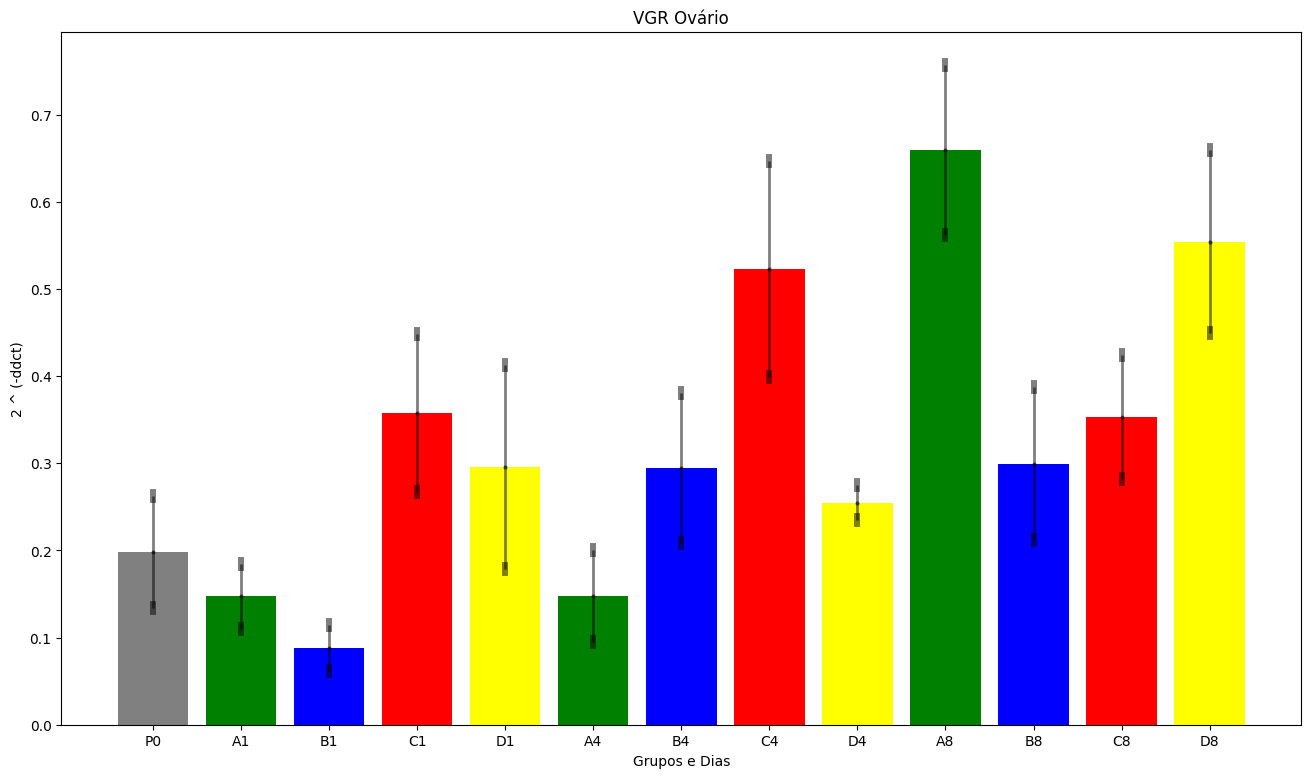

In [24]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VGR Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VGR'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

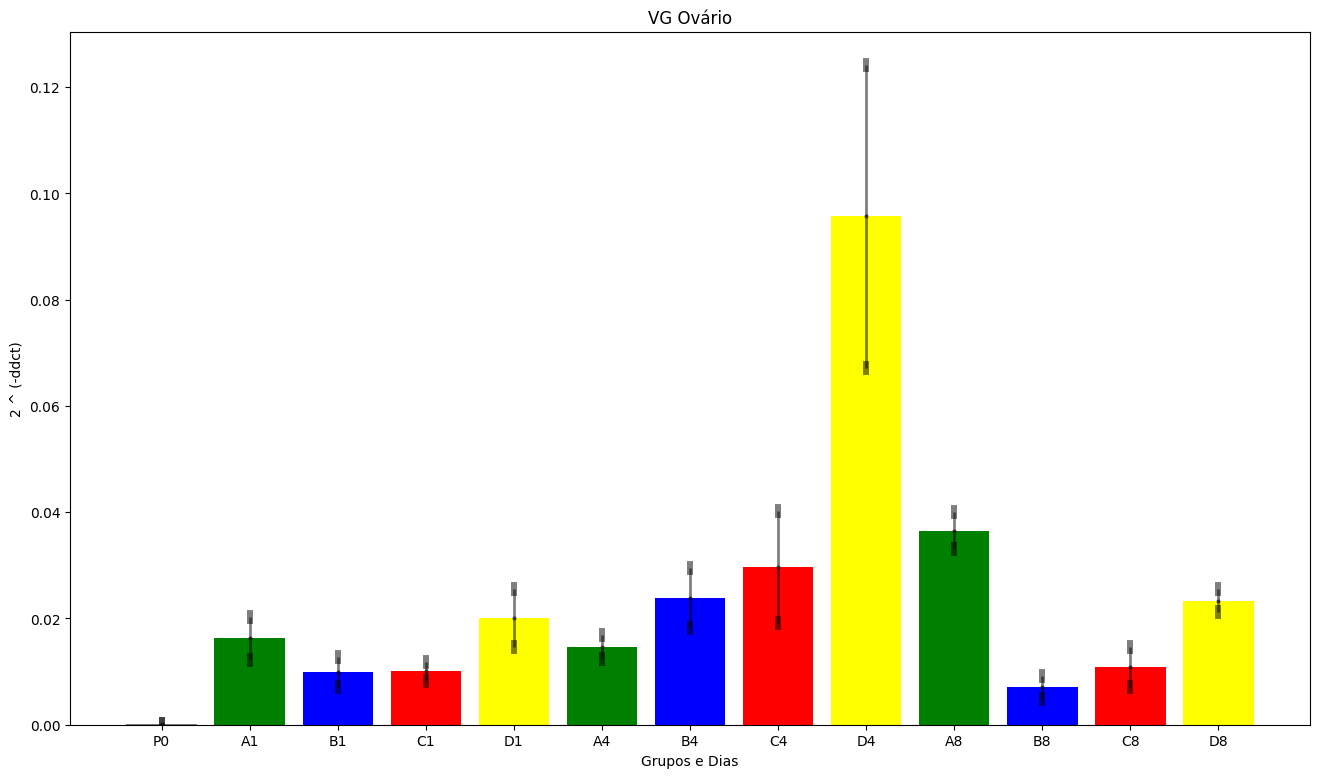

In [25]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VG Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VG'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

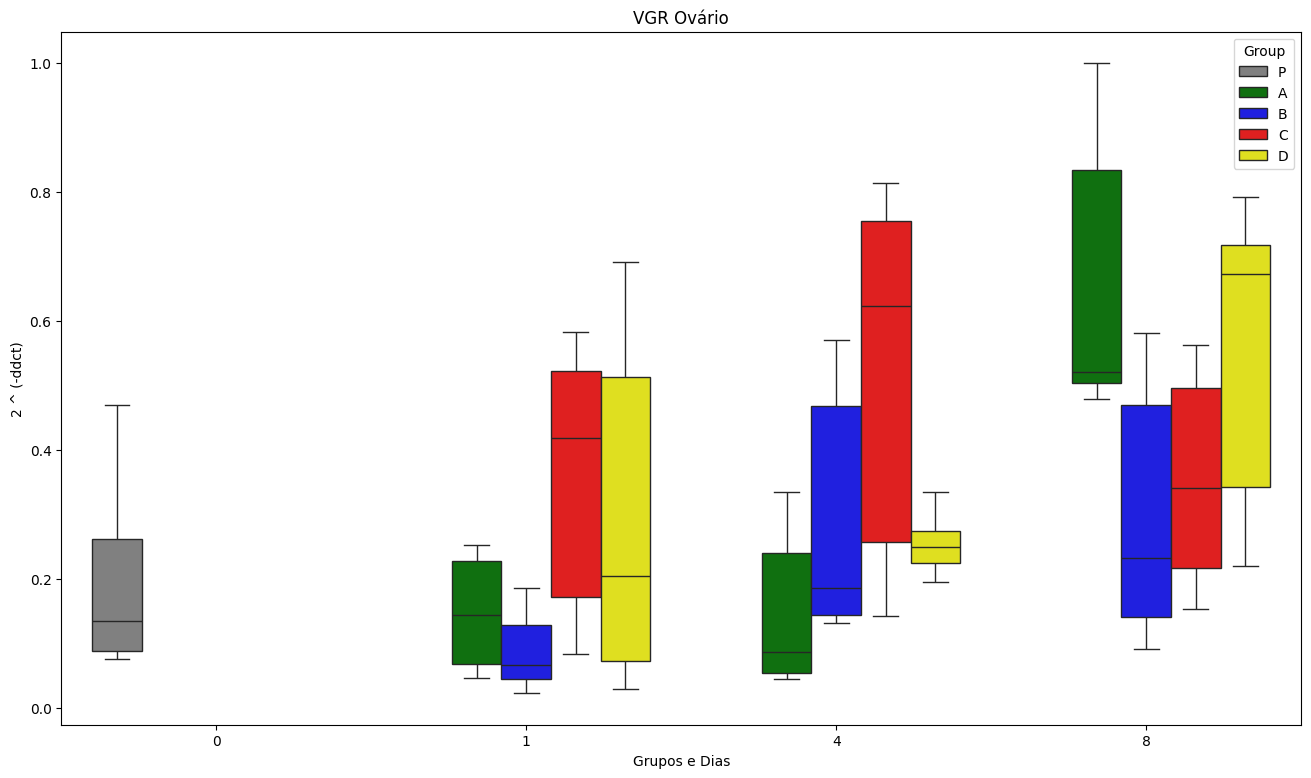

In [26]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VGR Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)
plt.savefig('vgr_ovario.png')
plt.savefig('vgr_ovario.pdf')

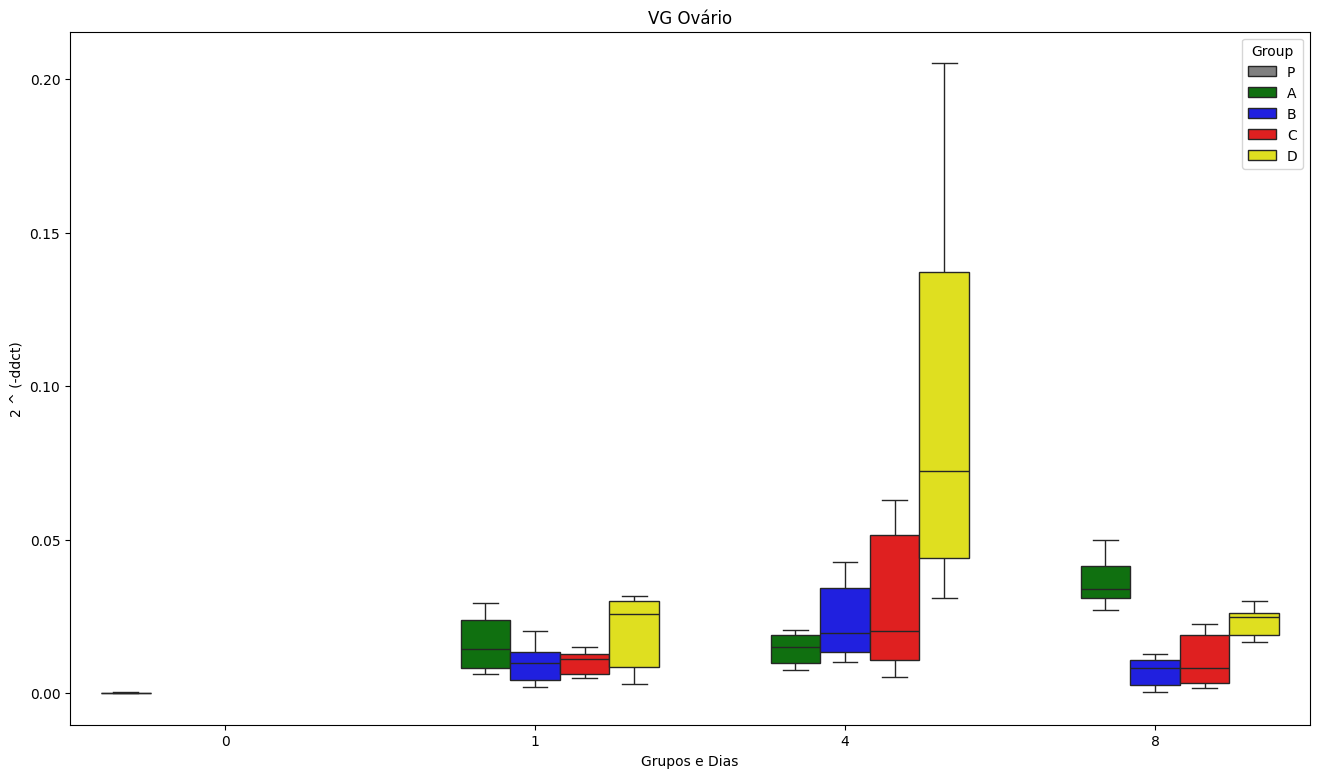

In [27]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VG Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)
plt.savefig('vg_ovario.png')
plt.savefig('vg_ovario.pdf')

<Axes: xlabel='Day', ylabel='EXP_DDCT_VGR'>

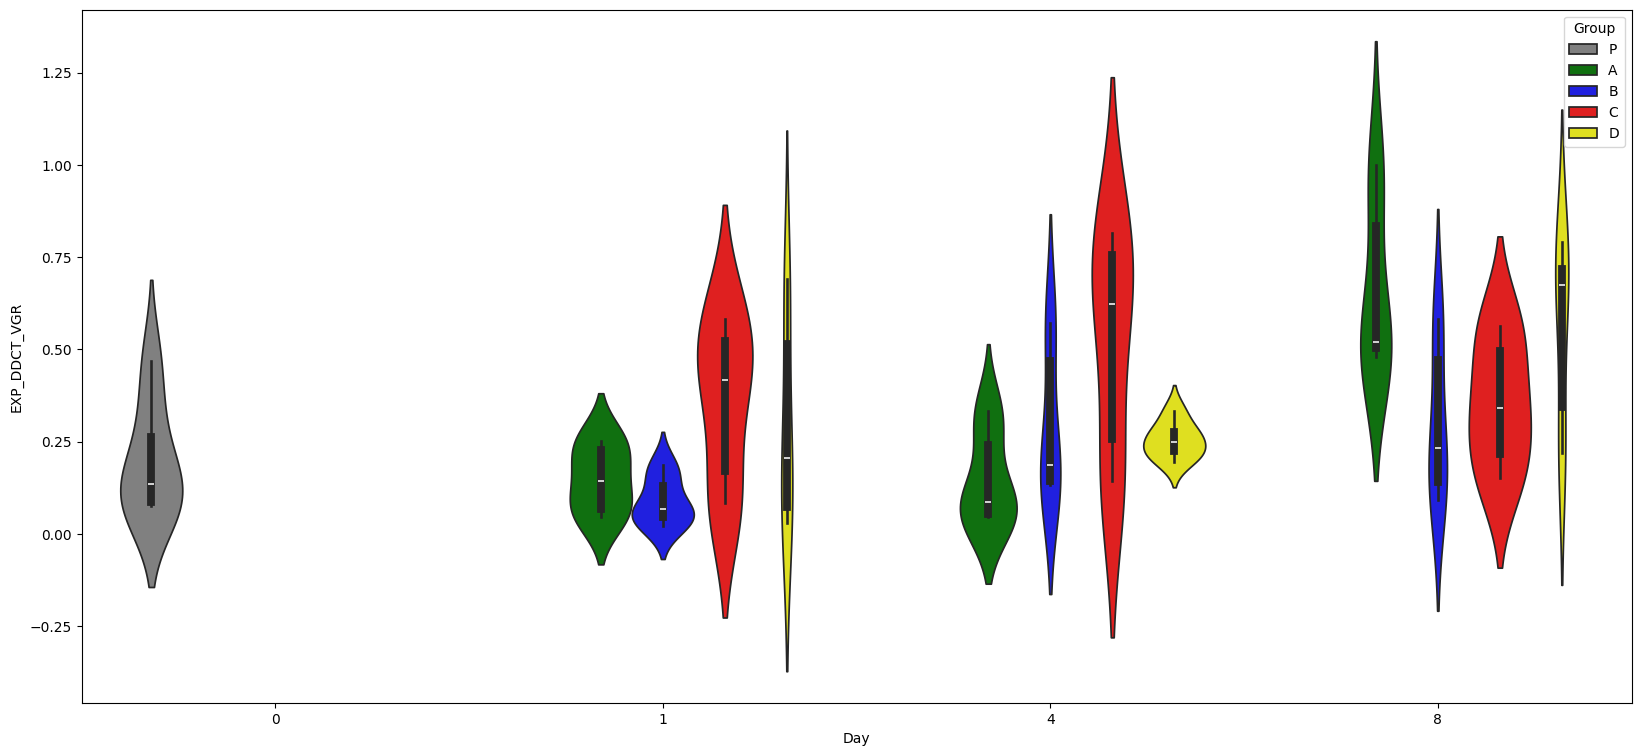

In [28]:
import seaborn as sns
plt.figure(figsize=(20, height))
sns.violinplot(data=df_mean, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)


<Axes: xlabel='Day', ylabel='EXP_DDCT_VG'>

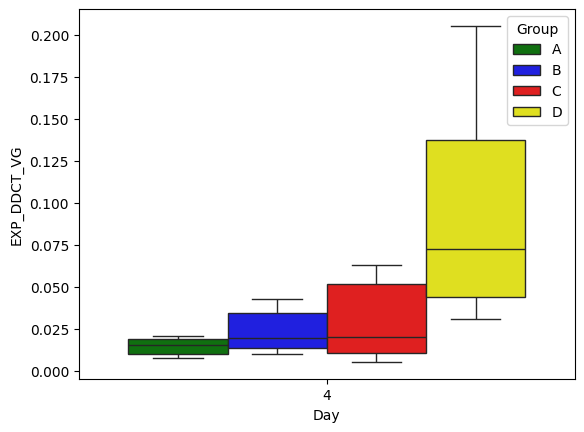

In [29]:
import seaborn as sns
sns.boxplot(data=df_mean[df_mean.Day == 4], x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)


<Axes: >

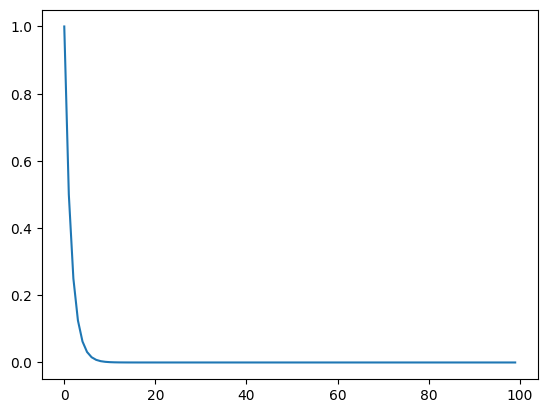

In [30]:
values = range(0, 100)
exp_2 = [2**(-v) for v in values]

sns.lineplot(exp_2)

In [31]:
 # sns.barplot(x="Day_", hue="Group_", y="EXP_DDCT_VGR_mean",  data=df_day_stats)
df_plot_vgr = df_day_stats
df_plot_vgr['x'] = df_plot_vgr['Day_']
df_plot_vgr['y'] = df_plot_vgr['Day_']

In [32]:
def interpret_ttest(a, b, alpha=0.05):
    t_stat, df, cv, p = independent_ttest(a, b, alpha)
    print('t=%.3f, df=%d, cv=%.5f, p=%.8f' % (t_stat, df, cv, p))
#     # interpret via critical value
#     if abs(t_stat) <= cv:
#         print('Accept null hypothesis (Same distributions).')
#     else:
#         print('Reject the null hypothesis (Different distributions).')
    # interpret via p-value
    if p > alpha:
        print(colored('Accept null hypothesis (Same distributions).', 'green'))
    else:
        print(colored('Reject the null hypothesis (Different distributions).', 'red'))

In [33]:
interpret_ttest(s,s2)

t=51.735, df=9998, cv=1.64501, p=0.00000000
Reject the null hypothesis (Different distributions).


In [34]:
def interpret_kwtest(a, b, alpha = 0.05):
    stat, p = stats.kruskal(a, b)
    print('Statistics=%.3f, p=%.8f' % (stat, p))
    # interpret

    if p > alpha:
        print(colored('Same distributions (fail to reject H0)', 'green'))
    else:
        print(colored('Different distributions (reject H0)', 'red'))

In [35]:
interpret_kwtest(s,s2)

Statistics=2142.043, p=0.00000000
Different distributions (reject H0)


In [36]:
from scipy.stats import shapiro
# normality test
# interpret results
def interpret_normaltest(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    if p > alpha:
        print(colored('Sample looks Gaussian (fail to reject H0)', 'green'))
    else:
        print(colored('Sample does not look Gaussian (reject H0)', 'red'))



In [37]:
interpret_normaltest(s)

Statistics=1.000, p=0.462
Sample looks Gaussian (fail to reject H0)


In [38]:
interpret_normaltest(s2)

Statistics=1.000, p=0.376
Sample looks Gaussian (fail to reject H0)


In [39]:
interpret_normaltest(zz)

Statistics=0.236, p=0.000
Sample does not look Gaussian (reject H0)


## Normality Tests

In [40]:
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.0951,1.984,0.029256,0.252788
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.2301,2.021,0.026643,0.246387
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.3211,4.258,0.006254,0.052265
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.2591,4.448,0.006528,0.045816
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.0551,2.521,0.015039,0.174222


In [41]:
groups = df_mean.Group.unique()
groups

array(['A', 'P', 'B', 'C', 'D'], dtype=object)

In [42]:
df_mean.groupby(['Day', 'Group']).count()

Amostra  RPL32  VGR  VG  DCT_VG  DCT_VGR  DDCT_VG  DDCT_VGR  \
Day Group                                                                
0   P            6      6    6   5       5        6        5         6   
1   A            6      6    6   6       6        6        6         6   
    B            6      6    6   6       6        6        6         6   
    C            6      6    6   6       6        6        6         6   
    D            6      6    6   6       6        6        6         6   
4   A            6      6    6   6       6        6        6         6   
    B            6      6    6   6       6        6        6         6   
    C            6      6    6   6       6        6        6         6   
    D            6      6    6   6       6        6        6         6   
8   A            6      6    6   6       6        6        6         6   
    B            6      6    6   6       6        6        6         6   
    C            6      6    6   6       6        6        6         6   
    D            6      6    6   6       6        6        6         6   

           EXP_DDCT_VG  EXP_DDCT_VGR  
Day Group                             
0   P                5             6  
1   A                6             6  
    B                6             6  
    C                6             6  
    D                6             6  
4   A                6             6  
    B                6             6  
    C                6             6  
    D                6             6  
8   A                6             6  
    B                6             6  
    C                6             6  
    D                6             6

In [43]:
combinations = [ ('A', 'B'),
('A', 'C'),
('A', 'D'),
('B', 'C'),
('B', 'D'),
('C', 'D'),] 

In [44]:
pair_distributions_vg  = {f"{g1}-{g2}-{d}": (
                          df_mean[(df_mean['Group'] == g1) & (df_mean['Day'] == d)]['EXP_DDCT_VG'].values,  
                          df_mean[(df_mean['Group'] == g2) & (df_mean['Day'] == d)]['EXP_DDCT_VGR'].values) for g1, g2 in combinations for d in [1, 4, 8]}
pair_distributions_vgr  = {f"{g1}-{g2}-{d}": (
                          df_mean[(df_mean['Group'] == g1) & (df_mean['Day'] == d)]['EXP_DDCT_VGR'].values, 
                          df_mean[(df_mean['Group'] == g2) & (df_mean['Day'] == d)]['EXP_DDCT_VGR'].values) for g1, g2 in combinations for d in [1, 4, 8]}

In [45]:
days = [1, 4, 8 ]

In [46]:
fields = ['EXP_DDCT_VG', 'EXP_DDCT_VGR']

In [47]:
def interpret_kwtest_1way(a, alpha = 0.05):
    stat, p = stats.kruskal(a[0], a[1], a[2])
    print('Statistics=%.3f, p=%.8f' % (stat, p))
    # interpret

    if p > alpha:
        print(colored('Same distributions (fail to reject H0)', 'green'))
    else:
        print(colored('Different distributions (reject H0)', 'red'))

In [48]:
for f in fields: 
    for g in ['A', 'B', 'C', 'D']: 
        dists = []
        dist_str = ''
        for d in days: 
            dist_str += f'{g}{d} '
            dists.append(df_mean[(df_mean.Day == d) & (df_mean.Group == g)][f].values)
        print(f, g, f'fone_way({dist_str})')
        interpret_kwtest_1way(dists)
        print()

EXP_DDCT_VG A fone_way(A1 A4 A8 )
Statistics=10.749, p=0.00463431
Different distributions (reject H0)

EXP_DDCT_VG B fone_way(B1 B4 B8 )
Statistics=6.823, p=0.03299447
Different distributions (reject H0)

EXP_DDCT_VG C fone_way(C1 C4 C8 )
Statistics=2.538, p=0.28111095
Same distributions (fail to reject H0)

EXP_DDCT_VG D fone_way(D1 D4 D8 )
Statistics=10.819, p=0.00447452
Different distributions (reject H0)

EXP_DDCT_VGR A fone_way(A1 A4 A8 )
Statistics=11.380, p=0.00337940
Different distributions (reject H0)

EXP_DDCT_VGR B fone_way(B1 B4 B8 )
Statistics=6.398, p=0.04080991
Different distributions (reject H0)

EXP_DDCT_VGR C fone_way(C1 C4 C8 )
Statistics=2.246, p=0.32536521
Same distributions (fail to reject H0)

EXP_DDCT_VGR D fone_way(D1 D4 D8 )
Statistics=4.222, p=0.12110333
Same distributions (fail to reject H0)



In [56]:
for f in fields: 
    for d in days: 
        dists = []
        dist_str = ''
        for g in ['A', 'B', 'C', 'D']: 
            dist_str += f'{g}{d} '
            dists.append(df_mean[(df_mean.Day == d) & (df_mean.Group == g)][f].values)
        print(f, d, f'fone_way({dist_str})')
        interpret_kwtest_1way(dists)
        print()

EXP_DDCT_VG 1 fone_way(A1 B1 C1 D1 )
Statistics=2.047, p=0.35937394
Same distributions (fail to reject H0)

EXP_DDCT_VG 4 fone_way(A4 B4 C4 D4 )
Statistics=1.064, p=0.58733276
Same distributions (fail to reject H0)

EXP_DDCT_VG 8 fone_way(A8 B8 C8 D8 )
Statistics=11.474, p=0.00322494
Different distributions (reject H0)

EXP_DDCT_VGR 1 fone_way(A1 B1 C1 D1 )
Statistics=6.000, p=0.04978707
Different distributions (reject H0)

EXP_DDCT_VGR 4 fone_way(A4 B4 C4 D4 )
Statistics=6.468, p=0.03940281
Different distributions (reject H0)

EXP_DDCT_VGR 8 fone_way(A8 B8 C8 D8 )
Statistics=3.614, p=0.16414296
Same distributions (fail to reject H0)



## Normality Test for VG 

In [54]:
dists

[array([0.03319247, 0.0294416 , 0.1892021 , 0.22052284, 0.61089655,
        0.69159531]),
 array([0.27700809, 0.33425012, 0.22940997, 0.2688736 , 0.22298213,
        0.19533197]),
 array([0.22006475, 0.23667841, 0.72951017, 0.79168587, 0.66204446,
        0.6853914 ])]

In [49]:
len(pair_distributions_vg.keys())

18

In [50]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in pair_distributions_vg.items():
    print(f'Distributions {k}')
    interpret_normaltest(v[0])
    interpret_normaltest(v[1])

#     plt.hist(v, bins=7)
#     plt.gca().set(ylabel='Frequency')
#     plt.title(k)
#     plt.show()
    print('\n\n')

Distributions A-B-1
Statistics=0.881, p=0.274
Sample looks Gaussian (fail to reject H0)
Statistics=0.886, p=0.299
Sample looks Gaussian (fail to reject H0)



Distributions A-B-4
Statistics=0.885, p=0.292
Sample looks Gaussian (fail to reject H0)
Statistics=0.731, p=0.013
Sample does not look Gaussian (reject H0)



Distributions A-B-8
Statistics=0.940, p=0.656
Sample looks Gaussian (fail to reject H0)
Statistics=0.841, p=0.134
Sample looks Gaussian (fail to reject H0)



Distributions A-C-1
Statistics=0.881, p=0.274
Sample looks Gaussian (fail to reject H0)
Statistics=0.836, p=0.121
Sample looks Gaussian (fail to reject H0)



Distributions A-C-4
Statistics=0.885, p=0.292
Sample looks Gaussian (fail to reject H0)
Statistics=0.833, p=0.114
Sample looks Gaussian (fail to reject H0)



Distributions A-C-8
Statistics=0.940, p=0.656
Sample looks Gaussian (fail to reject H0)
Statistics=0.887, p=0.302
Sample looks Gaussian (fail to reject H0)



Distributions A-D-1
Statistics=0.881, p=0.274


## Normality Test for VGR


In [51]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in pair_distributions_vgr.items():
    print(f'Distributions {k}')
    interpret_normaltest(v[0])
    interpret_normaltest(v[1])

#     plt.hist(v, bins=7)
#     plt.gca().set(ylabel='Frequency')
#     plt.title(k)
#     plt.show()
    print('\n\n')

Distributions A-B-1
Statistics=0.883, p=0.283
Sample looks Gaussian (fail to reject H0)
Statistics=0.886, p=0.299
Sample looks Gaussian (fail to reject H0)



Distributions A-B-4
Statistics=0.787, p=0.045
Sample does not look Gaussian (reject H0)
Statistics=0.731, p=0.013
Sample does not look Gaussian (reject H0)



Distributions A-B-8
Statistics=0.732, p=0.013
Sample does not look Gaussian (reject H0)
Statistics=0.841, p=0.134
Sample looks Gaussian (fail to reject H0)



Distributions A-C-1
Statistics=0.883, p=0.283
Sample looks Gaussian (fail to reject H0)
Statistics=0.836, p=0.121
Sample looks Gaussian (fail to reject H0)



Distributions A-C-4
Statistics=0.787, p=0.045
Sample does not look Gaussian (reject H0)
Statistics=0.833, p=0.114
Sample looks Gaussian (fail to reject H0)



Distributions A-C-8
Statistics=0.732, p=0.013
Sample does not look Gaussian (reject H0)
Statistics=0.887, p=0.302
Sample looks Gaussian (fail to reject H0)



Distributions A-D-1
Statistics=0.883, p=0.283


## Comparison Scenarios

### Statistical Tests VG


#### Inter Group VG

In [52]:
for k, v in pair_distributions_vg.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B-1
Statistics=6.564, p=0.01040562
Different distributions (reject H0)



Scenario A-B-4
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-B-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-C-1
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-C-4
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-C-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-D-1
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-D-4
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-D-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario B-C-1
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario B-C-4
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario B-C-8
Statistics=8.308, p=0.00394775
Different distribut

### Statistical Tests VGR

#### Inter Group VGR

In [53]:
for k, v in pair_distributions_vgr.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print(a, b)
    print('\n\n')

Scenario A-B-1
Statistics=1.256, p=0.26233168
Same distributions (fail to reject H0)
[0.25278802 0.24638733 0.0522654  0.04581615 0.17422215 0.11296909] [0.06519929 0.06820399 0.14906361 0.18582287 0.03765538 0.02259269]



Scenario A-B-4
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)
[0.09672281 0.07531077 0.04499785 0.04703896 0.28737371 0.33425012] [0.57117312 0.55903093 0.17458482 0.19614602 0.13397168 0.1320357 ]



Scenario A-B-8
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)
[0.93367994 1.         0.50278029 0.53625831 0.50417623 0.47896761] [0.58156002 0.54752624 0.22877479 0.23733553 0.11218876 0.09055888]



Scenario A-C-1
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)
[0.25278802 0.24638733 0.0522654  0.04581615 0.17422215 0.11296909] [0.4181232  0.41783348 0.55671081 0.58236679 0.0896222  0.08269821]



Scenario A-C-4
Statistics=5.026, p=0.02497468
Different distributions (reject H0)
[0.09672281 0.07531077